Goal: Analyze the 2023 salary data from the Ask a Manager survey to see what is normal for data-centric roles. 

Data from https://www.askamanager.org/2023/04/how-much-money-do-you-make-6.html

In [619]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [620]:
df = pd.read_csv('Ask A Manager Salary Survey 2023.csv')
print(df.shape)
df.columns

(16888, 20)


Index(['Timestamp', 'How old are you?', 'Industry', 'Functional area of job',
       'Job title', 'Job title - additional context', 'Annual salary (gross)',
       'Additional monetary compensation', 'Currency', 'Currency - other',
       'Income - additional context', 'Country', 'State', 'City',
       'Remote or on-site?', 'Years of experience, overall',
       'Years of experience in field', 'Highest level of education completed',
       'Gender', 'Race'],
      dtype='object')

# Initial Data Cleaning

In [622]:
# convert job titles and education to lower case to reduce duplicates 

df['job_title'] = df['Job title'].str.lower()
df['education'] = df['Highest level of education completed'].str.lower()

# remove whitespace at the beginning or end
df['job_title'] = df['job_title'].str.strip()

# replace "sr" or "sr." to "senior"
df['job_title'] = df['job_title'].apply(lambda x: x.replace('sr ','senior '))
df['job_title'] = df['job_title'].apply(lambda x: x.replace('sr.','senior'))

# create total compenstation column 
df['total comp'] = df['Annual salary (gross)'] + df['Additional monetary compensation']

In [678]:
df.head()

,Timestamp,How old are you?,Industry,Functional area of job,Job title,Job title - additional context,Annual salary (gross),Additional monetary compensation,Currency,Currency - other,...,Remote or on-site?,"Years of experience, overall",Years of experience in field,Highest level of education completed,Gender,Race,job_title,education,data_job,total comp
0,4/11/2023 11:02:00,35-44,Government & Public Administration,Engineering or Manufacturing,Materials Engineer,NaN,125000,800.0,USD,NaN,...,On-site,11-20 years,11-20 years,College degree,Man,White,materials engineer,college degree,no,125800.0
1,4/11/2023 11:02:07,25-34,"Galleries, Libraries, Archives & Museums","Galleries, Libraries, Archives & Museums",Assistant Branch Manager,NaN,71000,0.0,USD,NaN,...,On-site,8-10 years,5-7 years,Master's degree,Man,White,assistant branch manager,master's degree,no,71000.0
2,4/11/2023 11:02:12,35-44,Education (Higher Education),Education (Higher Education),Director of Financial Aid,NaN,60000,0.0,USD,NaN,...,On-site,21-30 years,11-20 years,College degree,Woman,White,director of financial aid,college degree,no,60000.0
3,4/11/2023 11:02:15,25-34,Education (Higher Education),Government & Public Administration,Administrative Assistant,NaN,42000,NaN,USD,NaN,...,On-site,2-4 years,2-4 years,College degree,Man,White,administrative assistant,college degree,no,NaN
4,4/11/2023 11:02:25,18-24,"Accounting, Banking & Finance",Administration,Executive Assistant,NaN,65000,0.0,USD,NaN,...,On-site,2-4 years,2-4 years,Some college,Woman,White,executive assistant,some college,no,65000.0


# Initial Data Exploration 

In [679]:
print('How many submissions?', df.shape[0])

How many submissions? 16888


In [680]:
print('How many unique job titles?', df['job_title'].nunique())

How many unique job titles? 8739


In [681]:
print('Submissions by Top 5 most represented countries, percent:')
(df['Country'].value_counts(normalize=True)*100).to_frame().head(5)

Submissions by Top 5 most represented countries, percent:


,Country
United States,82.828044
Canada,6.501658
United Kingdom,5.086452
Australia,1.652061
Germany,0.787541


In [682]:
print('Average salary by country & count of submissions:')
df.groupby('Country').agg({
    'Annual salary (gross)':'mean', 'Timestamp':'count'
    }).sort_values(by='Timestamp', ascending=False).round(0).head(10)

Average salary by country & count of submissions:


,Annual salary (gross),Timestamp
Country,,
United States,101354.0,13988
Canada,90466.0,1098
United Kingdom,54926.0,859
Australia,114679.0,279
Germany,69540.0,133
Ireland,69719.0,73
New Zealand,104053.0,64
Sweden,465980.0,31
Netherlands,70323.0,27


# Create labels

In [683]:
# Add column if job is associated to data in some way 

In [684]:
df["data_job"] = np.where(df["job_title"].str.contains('data|analytics|machine learning|ml|decision|insights|measurement|intelligence|predictive', regex= True, na=False), 'yes', 'no')
df.loc[df['data_job']=='yes'].head()

,Timestamp,How old are you?,Industry,Functional area of job,Job title,Job title - additional context,Annual salary (gross),Additional monetary compensation,Currency,Currency - other,...,Remote or on-site?,"Years of experience, overall",Years of experience in field,Highest level of education completed,Gender,Race,job_title,education,data_job,total comp
30,4/11/2023 11:03:33,35-44,Government & Public Administration,Computing or Tech,Senior Data Analyst,NaN,110000,4000.0,USD,NaN,...,Fully remote,8-10 years,8-10 years,Master's degree,Woman,White,senior data analyst,master's degree,yes,114000.0
56,4/11/2023 11:04:09,25-34,Government & Public Administration,Business or Consulting,Data Technical,Junior Data Analysis type role,21575,450.0,GBP,NaN,...,Hybrid,8-10 years,1 year or less,Some college,Man,White,data technical,some college,yes,22025.0
120,4/11/2023 11:06:11,35-44,Nonprofits,Computing or Tech,Data Analyst,Work for a labor union on contract and politic...,73000,0.0,USD,NaN,...,Hybrid,8-10 years,5-7 years,Master's degree,Man,"Hispanic, Latino, or Spanish origin",data analyst,master's degree,yes,73000.0
128,4/11/2023 11:06:19,35-44,"Accounting, Banking & Finance",Computing or Tech,Data analyst,NaN,45000,0.0,EUR,NaN,...,Hybrid,5-7 years,2-4 years,PhD,Woman,White,data analyst,phd,yes,45000.0
140,4/11/2023 11:06:34,25-34,Media & Digital,Computing or Tech,Senior Data Analyst,NaN,150000,15000.0,USD,NaN,...,Fully remote,5-7 years,5-7 years,College degree,Man,White,senior data analyst,college degree,yes,165000.0


# Data Exploration - US only 

In [685]:
# create dataframe for just the US:
df_usa = df.loc[df['Country']=='United States']

In [693]:
avg_non = df_usa.loc[df_usa['data_job']=='no']['Annual salary (gross)'].mean()
avg_data = df_usa.loc[df_usa['data_job']=='yes']['Annual salary (gross)'].mean()
lift = (avg_data-avg_non)/avg_non

print('Average salary:\n')
print(df_usa.groupby('data_job')['Annual salary (gross)'].mean())
print('\nData jobs paid', round(lift*100,1), '% more')

Average salary:

data_job
no     101073.534805
yes    110938.105528
Name: Annual salary (gross), dtype: float64

Data jobs paid 9.8 % more


In [694]:
avg_non = df_usa.loc[df_usa['data_job']=='no']['total comp'].mean()
avg_data = df_usa.loc[df_usa['data_job']=='yes']['total comp'].mean()
lift = (avg_data-avg_non)/avg_non

print('\nAverage total compenstation:')
print(df_usa.groupby('data_job')['total comp'].mean())
print('\nData jobs paid', round(lift*100,1), '% more')


Average total compenstation:
data_job
no     115362.649962
yes    129029.501567
Name: total comp, dtype: float64

Data jobs paid 11.8 % more


In [630]:
print('Age representation, percent:')
(df_usa.groupby('data_job')['How old are you?'].value_counts(normalize=True)*100).to_frame()

Age representation, percent:


How old are you?
data_job How old are you?                  
no       35-44                    41.398087
         25-34                    33.760118
         45-54                    16.490066
         55-64                     5.717439
         18-24                     1.935247
         65 or over                0.676968
         under 18                  0.022075
yes      25-34                    38.944724
         35-44                    38.944724
         45-54                    14.070352
         55-64                     5.778894
         18-24                     2.010050
         65 or over                0.251256

In [631]:
print('Industry representation - Top 10, percent:')
(df_usa['Industry'].value_counts(normalize=True)*100).to_frame().head(10)

Industry representation - Top 10, percent:


,Industry
Education (Higher Education),11.223465
Computing or Tech,10.656913
Nonprofits,9.366036
Health care,8.139702
Government & Public Administration,7.659208
Engineering or Manufacturing,6.174699
"Accounting, Banking & Finance",5.378657
Education (Primary/Secondary),3.600115
Biotechnology & Pharma,3.377797
"Galleries, Libraries, Archives & Museums",3.334768


In [632]:
print('Functional area of job - Top 10, percent:')
(df_usa['Functional area of job'].value_counts(normalize=True)*100).to_frame().head(10)

Functional area of job - Top 10, percent:


,Functional area of job
Computing or Tech,13.886890
Administration,8.771046
"Accounting, Banking & Finance",7.022593
"Marketing, Advertising & PR",5.878544
"Galleries, Libraries, Archives & Museums",4.727299
Recruitment or HR,4.453878
Engineering or Manufacturing,4.223629
Education (Higher Education),4.187653
Law,3.863865
Health care,3.748741


In [633]:
print('Job title - Top 10:')
df_usa['job_title'].value_counts().to_frame().head(10)

Job title - Top 10:


,job_title
project manager,156
senior software engineer,129
director,120
program manager,113
software engineer,106
teacher,94
manager,75
assistant professor,73
hr manager,72
administrative assistant,69


In [634]:
print('Salary distribution - USA:')
df_usa.groupby('data_job')['Annual salary (gross)'].mean().to_frame().round(0)

Salary distribution - USA:


,Annual salary (gross)
data_job,
no,101074.0
yes,110938.0


In [635]:
print('Remote or on-site? Percent:')
(df_usa.groupby('data_job')['Remote or on-site?'].value_counts(normalize=True)*100).to_frame()

Remote or on-site? Percent:


Remote or on-site?
data_job Remote or on-site?                        
no       Hybrid                           39.375369
         On-site                          31.718842
         Fully remote                     26.690786
         Other/it's complicated            2.215003
yes      Fully remote                     45.591940
         Hybrid                           43.828715
         On-site                          10.075567
         Other/it's complicated            0.503778

In [636]:
print('Years of experience, overall (percent)')
(df_usa.groupby('data_job')['Years of experience, overall'].value_counts(normalize=True)*100).to_frame()

Years of experience, overall (percent)


Years of experience, overall
data_job Years of experience, overall                              
no       11-20 years                                      39.352465
         21-30 years                                      18.447388
         8-10 years                                       17.579102
         5-7 years                                        11.817513
         2-4 years                                         6.063282
         31-40 years                                       4.966887
         1 year or less                                    0.949227
         41 years or more                                  0.824135
yes      11-20 years                                      35.929648
         8-10 years                                       18.090452
         5-7 years                                        17.587940
         21-30 years                                      15.577889
         2-4 years                                         7.286432
         31-40 years                                       4.020101
         1 year or less                                    1.005025
         41 years or more                                  0.502513

In [637]:
print('Years of experience in field (percent)')
(df_usa.groupby('data_job')['Years of experience in field'].value_counts(normalize=True)*100).to_frame()

Years of experience in field (percent)


Years of experience in field
data_job Years of experience in field                              
no       11-20 years                                      29.190581
         5-7 years                                        19.308315
         8-10 years                                       18.933039
         2-4 years                                        16.276674
         21-30 years                                       9.624724
         1 year or less                                    4.378219
         31-40 years                                       2.023547
         41 years or more                                  0.264901
yes      11-20 years                                      24.120603
         2-4 years                                        23.869347
         5-7 years                                        22.864322
         8-10 years                                       15.829146
         21-30 years                                       6.030151
         1 year or less                                    5.527638
         31-40 years                                       1.507538
         41 years or more                                  0.251256

In [638]:
print('Highest level of education completed, non-data jobs, percent')
(df_usa.loc[df_usa['data_job']=='no']['Highest level of education completed'].value_counts(normalize=True)*100).to_frame().head(10)

Highest level of education completed, non-data jobs, percent


,Highest level of education completed
College degree,45.766337
Master's degree,33.906181
Some college,6.896297
PhD,5.775188
"Professional degree (MD, JD, etc.)",5.494911
High School,1.349757
Associates,0.036879
EdD,0.014751
Associates degree,0.014751
Associates degree,0.014751


In [639]:
print('Highest level of education completed, data jobs, percent')
(df_usa.loc[df_usa['data_job']=='yes']['Highest level of education completed'].value_counts(normalize=True)*100).to_frame().head(10)

Highest level of education completed, data jobs, percent


,Highest level of education completed
College degree,43.324937
Master's degree,37.027708
PhD,11.586902
Some college,5.289673
"Professional degree (MD, JD, etc.)",1.763224
Associates Degree,0.251889
Paralegal certificate,0.251889
Bachelor's not in this field (but still in STEM),0.251889
BS & a grad certificate,0.251889


In [640]:
print('Gender, percent')
(df_usa.groupby('data_job')['Gender'].value_counts(normalize=True)*100).to_frame()

Gender, percent


Gender
data_job Gender                                                     
no       Woman                                             77.435329
         Man                                               16.991870
         Non-binary                                         3.429416
         Other or prefer not to answer                      0.835181
         Woman, Non-binary                                  0.820399
         Man, Non-binary                                    0.332594
         Man, Other or prefer not to answer                 0.051737
         Woman, Other or prefer not to answer               0.036955
         Man, Non-binary, Other or prefer not to answer     0.022173
         Non-binary, Other or prefer not to answer          0.022173
         Man, Woman                                         0.014782
         Woman, Non-binary, Other or prefer not to answer   0.007391
yes      Woman                                             69.017632
         Man                                               23.677582
         Non-binary                                         4.030227
         Other or prefer not to answer                      1.763224
         Woman, Non-binary                                  1.007557
         Man, Non-binary                                    0.251889
         Man, Other or prefer not to answer                 0.251889

In [641]:
print('Race, percent')
(df_usa['Race'].value_counts(normalize=True)*100).to_frame().head(10)

Race, percent


,Race
White,87.335869
Asian or Asian American,2.877233
Black or African American,1.879888
"Hispanic, Latino, or Spanish origin",1.815312
Another option not listed here or prefer not to answer,1.528306
"Hispanic, Latino, or Spanish origin, White",1.262826
"Asian or Asian American, White",1.183899
"Black or African American, White",0.365932
"Native American or Alaska Native, White",0.358757
"Middle Eastern or Northern African, White",0.236780


# Data Jobs Only Data Cleaning 

In [642]:
# make a list of potential keywords to filter job titles
job_title_keywords = ('data', 'analytics', 'data analyst', 'data scientist','machine learning', 'ml', 'decision', 
                      'insights', 'reporting', 
                     'measurement', 'intelligence', 'BI', 'dashboard', 'SQL', 'applied scientist', 'forecasting',
                     'predictive', 'prediction', 'artificial')

In [643]:
for keyword in job_title_keywords:
    print('How many job titles contain "'+keyword+'"?', df_usa['job_title'].str.contains(keyword).sum())

How many job titles contain "data"? 317
How many job titles contain "analytics"? 57
How many job titles contain "data analyst"? 89
How many job titles contain "data scientist"? 48
How many job titles contain "machine learning"? 2
How many job titles contain "ml"? 5
How many job titles contain "decision"? 3
How many job titles contain "insights"? 5
How many job titles contain "reporting"? 23
How many job titles contain "measurement"? 1
How many job titles contain "intelligence"? 27
How many job titles contain "BI"? 0
How many job titles contain "dashboard"? 0
How many job titles contain "SQL"? 0
How many job titles contain "applied scientist"? 1
How many job titles contain "forecasting"? 0
How many job titles contain "predictive"? 1
How many job titles contain "prediction"? 0
How many job titles contain "artificial"? 0


In [644]:
#filter dataset to job titles relevant to data (USA only)
df_data = df_usa.loc[df_usa['data_job']=='yes']

In [645]:
print('count of submissions:', df_data.shape[0])

count of submissions: 398


In [646]:
print('count of unique job titles:', df_data.job_title.nunique())

count of unique job titles: 225


In [647]:
print('Top 20 job titles')
df_data['job_title'].value_counts().to_frame().head(20)

Top 20 job titles


,job_title
data analyst,49
data scientist,23
senior data analyst,17
senior data scientist,10
data manager,9
data engineer,9
database administrator,7
analytics manager,6
metadata librarian,5
database manager,4


In [648]:
print('$0 salary:')
df_data.loc[df_data['Annual salary (gross)']==0]

$0 salary:


,Timestamp,How old are you?,Industry,Functional area of job,Job title,Job title - additional context,Annual salary (gross),Additional monetary compensation,Currency,Currency - other,...,City,Remote or on-site?,"Years of experience, overall",Years of experience in field,Highest level of education completed,Gender,Race,job_title,education,data_job


In [649]:
#if annual salary (gross) is 0, replace with Additional comp column
#df_data.loc[df_data['Annual salary (gross)'] == 0, 'Annual salary (gross)'] = 'Additional monetary compensation' 

In [650]:
print('salary distribution:')
df_data['Annual salary (gross)'].describe().to_frame().round(0)

salary distribution:


,Annual salary (gross)
count,398.0
mean,110938.0
std,48578.0
min,47.0
25%,75000.0
50%,100500.0
75%,135750.0
max,451000.0


# Categorize Data Jobs 

In [651]:
# Group similar job functions together 

df_data["job family"] = np.where(df_data["job_title"].str.contains('data scientist', regex= True, na=False), 'data scientist', 
                                 np.where(df_data["job_title"].str.contains('analyst', regex= True, na=False), 'data analyst', 
                                 np.where(df_data["job_title"].str.contains('analysis', regex= True, na=False), 'data analyst', 
                                 np.where(df_data["job_title"].str.contains('engineer', regex= True, na=False), 'data engineer', 
                                 np.where(df_data["job_title"].str.contains('developer', regex= True, na=False), 'data engineer', 
                                 np.where(df_data["job_title"].str.contains('architect', regex= True, na=False), 'data engineer', 
                                 np.where(df_data["job_title"].str.contains('business intelligence', regex= True, na=False), 'business intelligence', 
                                 np.where(df_data["job_title"].str.contains('visualization', regex= True, na=False), 'business intelligence', 
                                 np.where(df_data["job_title"].str.contains('database', regex= True, na=False), 'database', 
                                 np.where(df_data["job_title"].str.contains('analytics', regex= True, na=False), 'analytics', 
                                 np.where(df_data["job_title"].str.contains('machine learning', regex= True, na=False), 'machine learning', 
                                 np.where(df_data["job_title"].str.contains('data science', regex= True, na=False), 'data scientist',
                                 np.where(df_data["job_title"].str.contains('science', regex= True, na=False), 'data scientist',
                                 np.where(df_data["job_title"].str.contains('scientist', regex= True, na=False), 'data scientist',
                                 np.where(df_data["job_title"].str.contains('governance', regex= True, na=False), 'data governance',
                                 np.where(df_data["job_title"].str.contains('quality', regex= True, na=False), 'data governance',
                                 np.where(df_data["job_title"].str.contains('integrity', regex= True, na=False), 'data governance',
                                 np.where(df_data["job_title"].str.contains('intelligence', regex= True, na=False), 'intelligence',
                                 np.where(df_data["job_title"].str.contains('consultant', regex= True, na=False), 'consultant',
                                 np.where(df_data["job_title"].str.contains('modeling', regex= True, na=False), 'data scientist',
                                 np.where(df_data["job_title"].str.contains('entry', regex= True, na=False), 'data entry',
                                 np.where(df_data["job_title"].str.contains('clerk', regex= True, na=False), 'data entry',
                                 np.where(df_data["job_title"].str.contains('collection', regex= True, na=False), 'data entry',
                                 np.where(df_data["job_title"].str.contains('insights', regex= True, na=False), 'data analyst', 
                                 np.where(df_data["job_title"].str.contains('processor', regex= True, na=False), 'data analyst', 
                                 np.where(df_data["job_title"].str.contains('informatics', regex= True, na=False), 'informatics', 
                                 np.where(df_data["job_title"].str.contains('specialist', regex= True, na=False), 'data analyst', 
                                          'other')))))))))))))))))))))))))))

In [652]:
df_data['job family'].value_counts()

data analyst             135
data scientist            64
other                     63
analytics                 49
data engineer             37
database                  24
data governance            8
business intelligence      6
data entry                 5
intelligence               3
consultant                 3
informatics                1
Name: job family, dtype: int64

In [653]:
df_data.loc[df_data['job family']=='other']['job_title'].unique()

array(['data manager', 'data integration manager', 'data director',
       'cad/data manager', 'director of data management',
       'data center manager', 'metadata librarian', 'data coordinator',
       'assistant director, data management and curation services',
       'data associate 1', 'data services librarian',
       'head of cataloging and metadata services', 'aml investigator',
       'director, data management', 'data and operations manager',
       'data librarian', 'senior data technology coordinator',
       'metadata management librarian', 'linked data librarian',
       'data strategist', 'senior manager data management',
       'data and enrollment manager',
       'assistant director of admissions, strategic enrollment, & data management',
       'director, enterprise master data', 'data and assessment director',
       'data services coordinator', 'data',
       'research & instruction and data librarian',
       'clinical data coordinator', 'assistant director, data

In [703]:
# Group similar job levels together 

df_data["job level"] = np.where(df_data["job_title"].str.contains('senior', regex= True, na=False), 'senior', 
                                 np.where(df_data["job_title"].str.contains('lead', regex= True, na=False), 'lead/staff/principal', 
                                 np.where(df_data["job_title"].str.contains('principal', regex= True, na=False), 'lead/staff/principal', 
                                 np.where(df_data["job_title"].str.contains('staff', regex= True, na=False), 'lead/staff/principal', 
                                 np.where(df_data["job_title"].str.contains('manager', regex= True, na=False), 'manager', 
                                 np.where(df_data["job_title"].str.contains('head', regex= True, na=False), 'manager', 
                                 np.where(df_data["job_title"].str.contains('supervisor', regex= True, na=False), 'manager', 
                                 np.where(df_data["job_title"].str.contains('director', regex= True, na=False), 'director', 
                                 np.where(df_data["job_title"].str.contains('VP', regex= True, na=False), 'VP', 
                                 np.where(df_data["job_title"].str.contains('vice president', regex= True, na=False), 'VP',
                                 np.where(df_data["job_title"].str.contains('officer', regex= True, na=False), 'VP', 
                                 np.where(df_data["Years of experience in field"].str.contains('1 year or less', regex= True, na=False), 'entry', 
                                          'mid'))))))))))))

In [705]:
df_data['job level'].value_counts()

mid                     195
senior                   77
manager                  62
director                 26
entry                    18
lead/staff/principal     18
VP                        2
Name: job level, dtype: int64

In [706]:
df_data.loc[df_data['job level']=='other']['job_title'].unique()

array([], dtype=object)

# Explore Data Salaries (US Only)

In [707]:
print('Average salary by title & count of submissions by top 10 most popular job title:')
df_data.groupby('job_title').agg({
    'Annual salary (gross)':'mean', 'Timestamp':'count'
    }).reset_index().sort_values(by='Timestamp', ascending=False).round(0).head(10)

Average salary by title & count of submissions by top 10 most popular job title:


,job_title,Annual salary (gross),Timestamp
40,data analyst,77366.0,49
85,data scientist,142409.0,23
187,senior data analyst,109171.0,17
195,senior data scientist,169590.0,10
60,data engineer,131111.0,9
74,data manager,85613.0,9
94,database administrator,91143.0,7
7,analytics manager,152333.0,6
159,metadata librarian,65740.0,5
165,principal data scientist,201250.0,4


In [708]:
print('Average salary by job family & count of submissions by top 10 most popular job title:')
df_data.groupby('job family').agg({
    'Annual salary (gross)':'mean', 'Timestamp':'count'
    }).reset_index().sort_values(by='Timestamp', ascending=False).round(0).head(10)

Average salary by job family & count of submissions by top 10 most popular job title:


,job family,Annual salary (gross),Timestamp
3,data analyst,87718.0,135
7,data scientist,149365.0,64
11,other,95363.0,63
0,analytics,141109.0,49
4,data engineer,130470.0,37
8,database,86474.0,24
6,data governance,138323.0,8
1,business intelligence,124282.0,6
5,data entry,50610.0,5
2,consultant,111333.0,3


In [709]:
df_data_job_fam = df_data.loc[df_data['job family'] != 'other']

print('Average salary by job family & count of submissions by top 10 most popular job title:')
df_data_job_fam.groupby(['job family', 'job level']).agg({
    'Annual salary (gross)':'mean', 'Timestamp':'count'
    }).reset_index().sort_values(by=['job family', 'Annual salary (gross)'], ascending=False).round(0)

Average salary by job family & count of submissions by top 10 most popular job title:


,job family,job level,Annual salary (gross),Timestamp
38,intelligence,VP,163252.0,1
39,intelligence,manager,114750.0,2
37,informatics,director,95000.0,1
33,database,lead/staff/principal,178000.0,1
36,database,senior,120000.0,3
35,database,mid,80722.0,13
34,database,manager,73833.0,6
32,database,entry,45000.0,1
27,data scientist,entry,187588.0,4
28,data scientist,lead/staff/principal,179727.0,11


In [710]:
# create data from with salary average & count of submissions 

df_data__title_salary_avg = df_data.groupby(['job_title']).agg({
    'Annual salary (gross)':'mean', 'Timestamp':'count'
    }).round(0).reset_index().sort_values(by='Annual salary (gross)', ascending=False)

df_data__title_salary_avg = df_data__title_salary_avg.rename(columns={"Annual salary (gross)": "Average Salary", "Timestamp": "Count"})

#filter to jobs with at least 3 submissions
df_data__title_salary_avg = df_data__title_salary_avg.loc[df_data__title_salary_avg['Count']>=3]

In [711]:
df_data_salary_avg

,job_title,Average Salary,Count
179,principal data scientist,201250.0,4
91,data science manager,170000.0,4
217,senior data scientist,169590.0,10
151,lead data scientist,162000.0,4
10,analytics manager,152333.0,6
201,senior analytics engineer,145845.0,3
92,data scientist,142409.0,23
58,data architect,140000.0,3
67,data engineer,131111.0,9
213,senior data engineer,127367.0,3


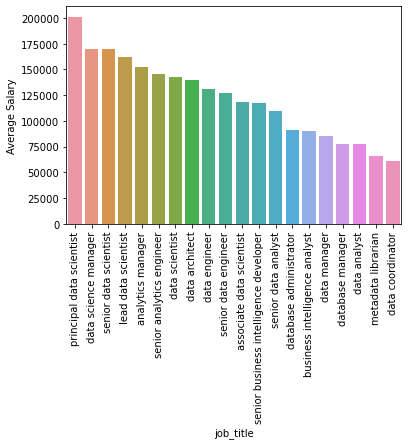

In [712]:
sns.barplot(data=df_data_salary_avg, x="job_title", y="Average Salary");
plt.xticks(rotation=90);

# Data by job family and level

In [713]:
# create data from with salary average & count of submissions 

df_data_fam_salary_avg = df_data_job_fam.groupby(['job family', 'job level']).agg({
    'Annual salary (gross)':'mean', 'Timestamp':'count'
    }).round(0).reset_index().sort_values(by='Annual salary (gross)', ascending=False)

df_data_fam_salary_avg = df_data_fam_salary_avg.rename(columns={"Annual salary (gross)": "Average Salary", "Timestamp": "Count"})

#filter to jobs with at least 3 submissions
df_data_fam_salary_avg = df_data_fam_salary_avg.loc[df_data_fam_salary_avg['Count']>=3]

In [714]:
df_data_fam_salary_avg

,job family,job level,Average Salary,Count
27,data scientist,entry,187588.0,4
28,data scientist,lead/staff/principal,179727.0,11
29,data scientist,manager,170000.0,4
31,data scientist,senior,169538.0,13
1,analytics,director,158765.0,10
4,analytics,senior,151029.0,7
2,analytics,manager,135567.0,21
18,data engineer,senior,134324.0,12
17,data engineer,mid,125667.0,24
3,analytics,mid,123446.0,10


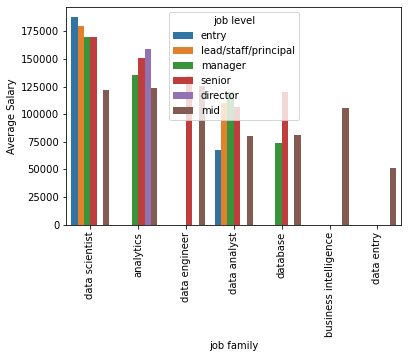

In [715]:
sns.barplot(data=df_data_fam_salary_avg, x="job family", y="Average Salary", hue='job level');
plt.xticks(rotation=90);

data analyst


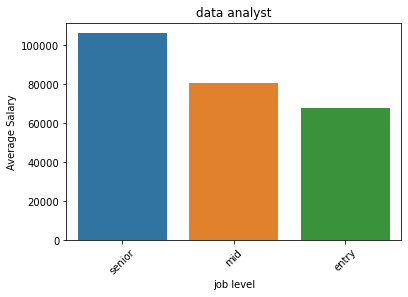

database


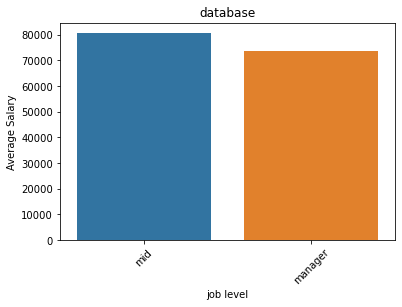

other


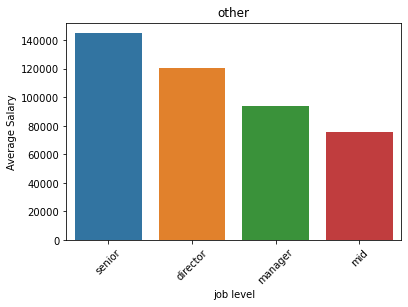

data scientist


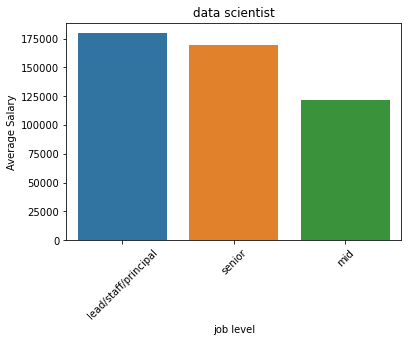

business intelligence
data engineer


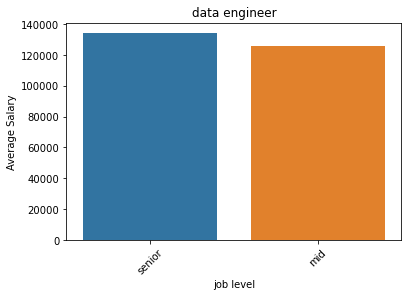

analytics


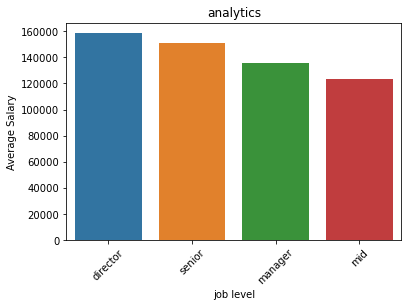

intelligence
consultant
data governance
informatics
data entry


In [718]:
job_fam_list = df_data['job family'].unique()
for job in job_fam_list:
    
    print(job)
    
    #create table filtered to job family 
    df_temp = df_data.loc[df_data['job family']==job]

    #group data by level to find average
    df_temp2 = df_temp.groupby(['job level']).agg({
        'Annual salary (gross)':'mean', 'Timestamp':'count'
        }).round(0).reset_index().sort_values(by='Annual salary (gross)', ascending=False)

    df_temp2 = df_temp2.rename(columns={"Annual salary (gross)": "Average Salary", "Timestamp": "Count"})

    #filter to jobs with at least 5 submissions
    df_temp3 = df_temp2.loc[df_temp2['Count']>=5]
    
    #if there's enough data, create a bar graph with average salary by level: 
    if df_temp3.shape[0]>0:
        sns.barplot(data=df_temp3, x="job level", y="Average Salary");
        plt.xticks(rotation=45);
        plt.title(job)
        plt.show()

# Explore other aspects by job type

In [719]:
# create tables with all data by job title
df_data_2 = df_data.loc[(df_data['job family']=='data analyst') | 
                       (df_data['job family']=='data scientist') | 
                        (df_data['job family']=='data engineer') | 
                        (df_data['job family']=='analytics') ]

df_data_2

,Timestamp,How old are you?,Industry,Functional area of job,Job title,Job title - additional context,Annual salary (gross),Additional monetary compensation,Currency,Currency - other,...,"Years of experience, overall",Years of experience in field,Highest level of education completed,Gender,Race,job_title,education,data_job,job family,job level
30,4/11/2023 11:03:33,35-44,Government & Public Administration,Computing or Tech,Senior Data Analyst,NaN,110000,4000.0,USD,NaN,...,8-10 years,8-10 years,Master's degree,Woman,White,senior data analyst,master's degree,yes,data analyst,senior
120,4/11/2023 11:06:11,35-44,Nonprofits,Computing or Tech,Data Analyst,Work for a labor union on contract and politic...,73000,0.0,USD,NaN,...,8-10 years,5-7 years,Master's degree,Man,"Hispanic, Latino, or Spanish origin",data analyst,master's degree,yes,data analyst,mid
140,4/11/2023 11:06:34,25-34,Media & Digital,Computing or Tech,Senior Data Analyst,NaN,150000,15000.0,USD,NaN,...,5-7 years,5-7 years,College degree,Man,White,senior data analyst,college degree,yes,data analyst,senior
159,4/11/2023 11:06:57,35-44,Insurance,"Accounting, Banking & Finance",Insurance Data Analyst,Level II (there are three levels total),68500,0.0,USD,NaN,...,11-20 years,1 year or less,Master's degree,Woman,White,insurance data analyst,master's degree,yes,data analyst,entry
166,4/11/2023 11:07:04,35-44,Biotechnology & Pharma,Computing or Tech,Principal Data Scientist,NaN,155000,31000.0,USD,NaN,...,11-20 years,8-10 years,PhD,Woman,White,principal data scientist,phd,yes,data scientist,lead/staff/principal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16768,5/26/2023 5:59:12,35-44,"Accounting, Banking & Finance","Accounting, Banking & Finance",Data Analyst,NaN,100000,25000.0,USD,NaN,...,8-10 years,5-7 years,Master's degree,Man,Black or African American,data analyst,master's degree,yes,data analyst,mid
16769,5/27/2023 15:52:03,55-64,Education (Higher Education),Research,Data analyst,NaN,65000,0.0,USD,NaN,...,21-30 years,21-30 years,College degree,Woman,Black or African American,data analyst,college degree,yes,data analyst,mid
16829,6/26/2023 17:21:51,35-44,Retail,Computing or Tech,"Manager, Omni Channel Analytics","I work in A|B Testing Analytics, also categori...",126000,12000.0,USD,NaN,...,11-20 years,11-20 years,College degree,Woman,White,"manager, omni channel analytics",college degree,yes,analytics,manager
16830,6/26/2023 23:33:46,25-34,Government Affairs & Lobbying,Computing or Tech,Data Scientist,NaN,97000,0.0,USD,NaN,...,11-20 years,5-7 years,Master's degree,Non-binary,White,data scientist,master's degree,yes,data scientist,mid


In [720]:
print('Age representation, percent:')
(df_data_2.groupby('job family')['How old are you?'].value_counts(normalize=True)*100).to_frame()

Age representation, percent:


How old are you?
job family     How old are you?                  
analytics      35-44                    53.061224
               25-34                    30.612245
               45-54                    14.285714
               55-64                     2.040816
data analyst   25-34                    39.259259
               35-44                    35.555556
               45-54                    11.111111
               55-64                     9.629630
               18-24                     3.703704
               65 or over                0.740741
data engineer  25-34                    43.243243
               35-44                    37.837838
               45-54                    13.513514
               55-64                     5.405405
data scientist 25-34                    48.437500
               35-44                    42.187500
               45-54                     7.812500
               18-24                     1.562500

In [721]:
print('Years of experience, overall (percent)')
df_data.groupby('Years of experience, overall')['Years of experience in field'].value_counts().to_frame()

Years of experience, overall (percent)


Years of experience in field
Years of experience, overall Years of experience in field                              
1 year or less               1 year or less                                           4
11-20 years                  11-20 years                                             65
                             5-7 years                                               28
                             8-10 years                                              26
                             2-4 years                                               19
                             1 year or less                                           5
2-4 years                    2-4 years                                               24
                             1 year or less                                           4
                             5-7 years                                                1
21-30 years                  11-20 years                                             29
                             21-30 years                                             17
                             8-10 years                                               7
                             2-4 years                                                4
                             5-7 years                                                4
                             1 year or less                                           1
31-40 years                  21-30 years                                              6
                             31-40 years                                              6
                             11-20 years                                              2
                             1 year or less                                           1
                             2-4 years                                                1
41 years or more             21-30 years                                              1
                             41 years or more                                         1
5-7 years                    5-7 years                                               35
                             2-4 years                                               32
                             1 year or less                                           3
8-10 years                   8-10 years                                              30
                             5-7 years                                               23
                             2-4 years                                               15
                             1 year or less                                           4

In [725]:
print('Highest level of education completed')
(df_data_2.groupby('job family')['Highest level of education completed'].value_counts(normalize=True)*100).to_frame()

Highest level of education completed


Highest level of education completed
job family     Highest level of education completed                                                  
analytics      Master's degree                                                              51.020408
               College degree                                                               34.693878
               PhD                                                                           8.163265
               Professional degree (MD, JD, etc.)                                            4.081633
               Some college                                                                  2.040816
data analyst   College degree                                                               47.761194
               Master's degree                                                              38.805970
               Some college                                                                  7.462687
               PhD                                                                           2.238806
               Associates Degree                                                             0.746269
               BS & a grad certificate                                                       0.746269
               Bachelor's not in this field (but still in STEM)                              0.746269
               Paralegal certificate                                                         0.746269
               Professional degree (MD, JD, etc.)                                            0.746269
data engineer  College degree                                                               48.648649
               Master's degree                                                              37.837838
               PhD                                                                           8.108108
               Some college                                                                  5.405405
data scientist PhD                                                                          45.312500
               College degree                                                               26.562500
               Master's degree                                                              26.562500
               Professional degree (MD, JD, etc.)                                            1.562500

In [723]:
print('Gender, percent')
(df_data_2.groupby('job family')['Gender'].value_counts(normalize=True)*100).to_frame()

Gender, percent


Gender
job family     Gender                                       
analytics      Woman                               69.387755
               Man                                 20.408163
               Non-binary                           6.122449
               Man, Other or prefer not to answer   2.040816
               Other or prefer not to answer        2.040816
data analyst   Woman                               74.626866
               Man                                 18.656716
               Non-binary                           2.985075
               Other or prefer not to answer        1.492537
               Woman, Non-binary                    1.492537
               Man, Non-binary                      0.746269
data engineer  Woman                               62.162162
               Man                                 35.135135
               Non-binary                           2.702703
data scientist Woman                               56.250000
               Man                                 29.687500
               Non-binary                           6.250000
               Other or prefer not to answer        6.250000
               Woman, Non-binary                    1.562500

In [724]:
print('Race, percent')
(df_data['Race'].value_counts(normalize=True)*100).to_frame().head(10)

Race, percent


,Race
White,85.929648
Asian or Asian American,5.276382
Another option not listed here or prefer not to answer,2.010050
"Asian or Asian American, White",1.758794
Black or African American,1.507538
"Hispanic, Latino, or Spanish origin",1.005025
"Native American or Alaska Native, White",1.005025
"Hispanic, Latino, or Spanish origin, White",0.753769
"Asian or Asian American, Native American or Alaska Native, White",0.251256
"Hispanic, Latino, or Spanish origin, Native American or Alaska Native",0.251256
